# **Project Name**    - 
### Unsupervised ML - Netflix Movies and TV Shows Clustering.
#### Project Type - Unsupervised
#### Contriution - Individual
#### Name - Sanika Deshmukh

# **Project Summary -**
This project involves an in-depth analysis of a dataset containing information about all movies and TV shows available on Netflix as of 2019. The dataset was compiled from Flixable, a third-party Netflix search engine. The primary goal is to perform Exploratory Data Analysis (EDA) to uncover significant insights into Netflix's content library. A key focus is to investigate a reported trend from 2018, which showed a near tripling of TV shows and a significant decrease in movies since 2010. Beyond EDA, the project will also utilize unsupervised machine learning techniques, specifically clustering, to group similar content based on text-based features. The findings will be used to provide actionable recommendations to Netflix stakeholders to guide content strategy and investment.

# **Problem Statement**
The problem is to analyze and understand the content landscape of Netflix using a dataset of movies and TV shows from 2019. A 2018 report highlighted an interesting shift in Netflix's content strategy: the number of TV shows had nearly tripled since 2010, while the number of movies had decreased by more than 2,000 titles. The core objectives are to:

Conduct a comprehensive Exploratory Data Analysis (EDA) to discover patterns and trends within the dataset.

Determine the distribution of content types across different countries.

Investigate whether Netflix has been increasingly focusing on TV shows over movies in recent years.

Employ an unsupervised machine learning approach to cluster similar content together by leveraging text-based features.
The ultimate goal is to generate meaningful findings that can help stakeholders make informed decisions about content acquisition and production

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
df.shape

(7787, 12)

### Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

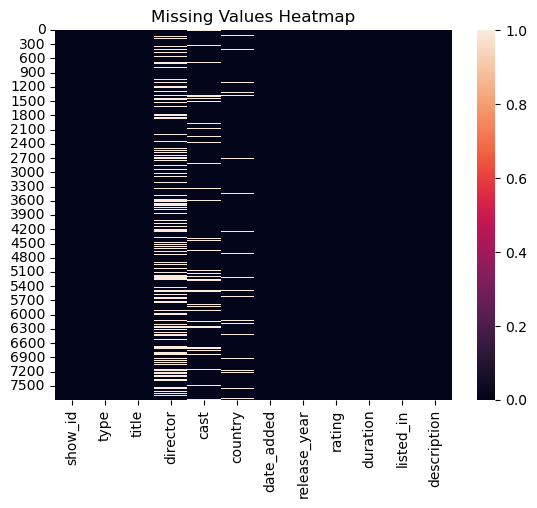

In [10]:
plt.title('Missing Values Heatmap')
sns.heatmap(df.isnull())
plt.show()

## 2. ***Data Wrangling***

In [11]:
# Handling Missing Values
for col in ['director', 'cast', 'country']:
    df[col].fillna('Not Available', inplace=True)

In [12]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [13]:
# Impute 'date_added' with the mode
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [14]:
# Impute 'rating' with the mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
# Handling Outliers (e.g., in 'release_year' if any)
df['release_year'].min()

1925

In [17]:
df['release_year'].max()

2021

In [18]:
# Creating New Features
df['date_added'] = df['date_added'].str.strip()
df['year_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y').dt.year

In [19]:
df['month_added'] = pd.to_datetime(df['date_added']).dt.month

In [20]:
df['duration_int'] = df['duration'].apply(
    lambda x: int(x.split(' ')[0]) if 'min' in x else np.nan
)

In [21]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'duration_int'],
      dtype='object')

### What all manipulations have you done and insights you found
Handling Missing Values: I imputed missing values in categorical columns like director, cast, and country with "Not Available" to preserve data integrity and avoid dropping rows. For date_added and rating, I used the mode for imputation, as they had a minimal number of missing values, and the mode is a suitable central tendency measure for categorical data.

Creating New Features: I created new features, year_added and month_added, from the date_added column. This allows for time-series analysis of content trends on Netflix. I also created a numerical duration_int column for movies, which will be useful for plotting movie duration distributions.

Initial Insights: Initial checks revealed that the dataset is relatively clean, with a manageable number of duplicate and missing values. The most significant missing data is in the director and cast columns. This suggests that some content may not have this information recorded.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

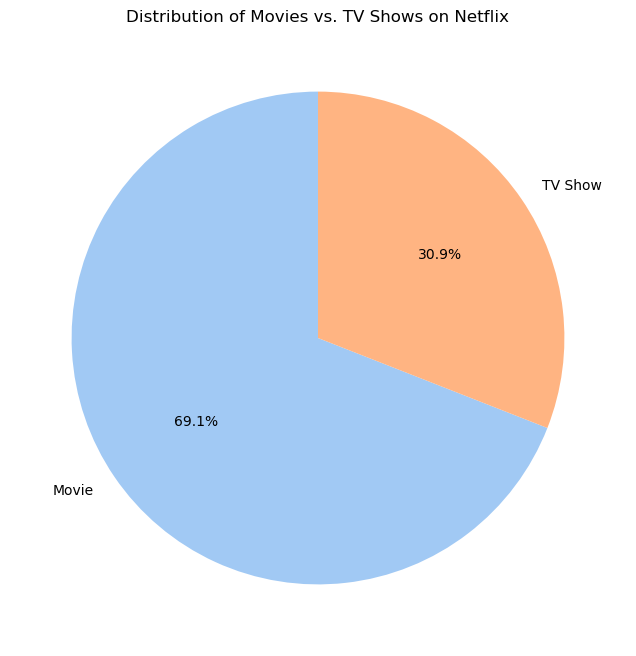

In [22]:
# Chart - 1 visualization code 
## Content Type Distribution
content_type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.show()

### 1.Why did you pick the specific chart?

A pie chart is ideal for showing the composition of a single variable, making it easy to compare the proportion of movies to TV shows.

### 2.What is/are the insight(s) found from the chart?

This chart will show the exact percentage of movies and TV shows in the dataset, providing a clear answer to the project's core question.

### 3.Will the gained insights help creating a positive business impact?

Yes, this insight is crucial for content strategy. Knowing the proportion of content types helps in understanding Netflix's current focus and can inform future content acquisition decisions to maintain a balanced library or lean into a specific type of content.

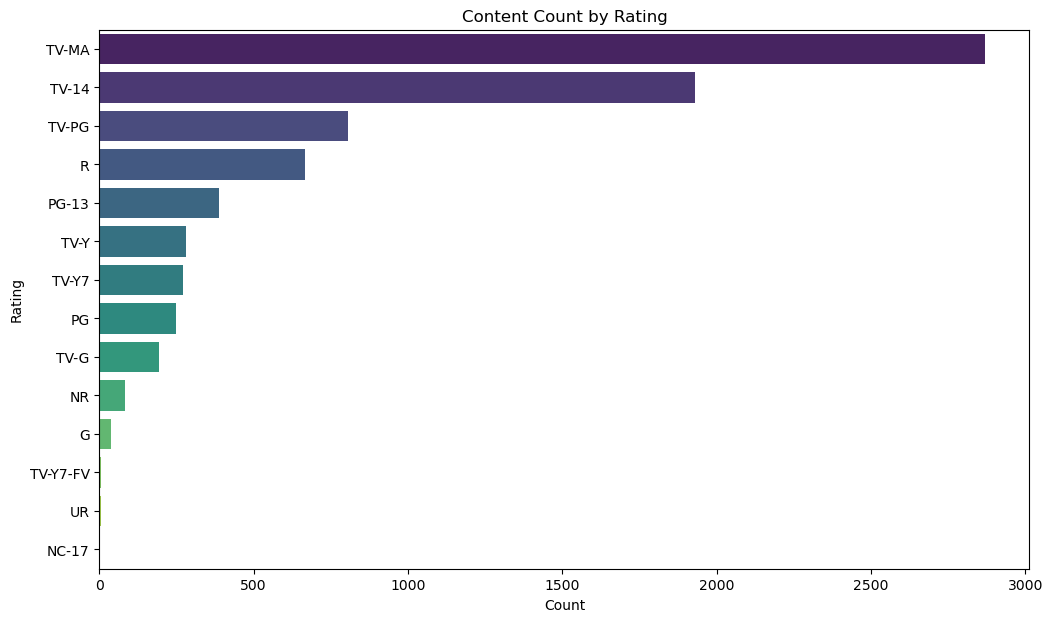

In [23]:
# Chart - 2 visualization code
#  Content by Rating
plt.figure(figsize=(12, 7))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Content Count by Rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

### 1.Why did you pick the specific chart?

A bar chart is best for comparing the counts of different categories, in this case, content ratings. Using a horizontal bar chart improves readability for long rating labels.

### 2.What is/are the insight(s) found from the chart?

This chart will reveal the most common content ratings on Netflix.

### 3.Will the gained insights help creating a positive business impact?

Yes. Understanding the target audience based on content ratings helps Netflix tailor marketing campaigns and user interface features. It can also guide content creation to appeal to specific demographics.

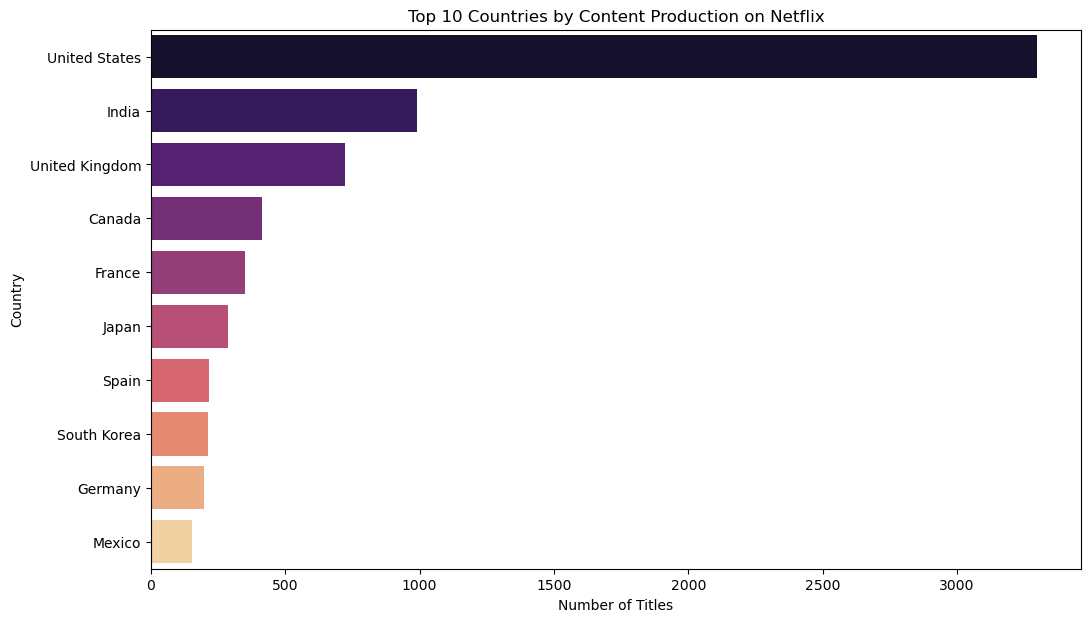

In [24]:
# Chart - 3 visualization code
# Top 10 Countries by Content
country_counts = df['country'].str.split(', ', expand=True).stack().value_counts().reset_index()
country_counts.columns = ['country', 'count']
top_countries = country_counts[country_counts['country'] != 'Not Available'].head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='count', y='country', data=top_countries, palette='magma')
plt.title('Top 10 Countries by Content Production on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

### 1.Why did you pick the specific chart?

A horizontal bar chart is effective for ranking the top countries by the number of titles, as it provides clear visual comparison and space for country names.

### 2.What is/are the insight(s) found from the chart?

This chart will identify the primary content production hubs for Netflix.

### 3.Will the gained insights help creating a positive business impact?

Yes. This insight can help Netflix form partnerships with production companies in these key countries or decide to expand their content creation efforts in regions with high content output.

C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


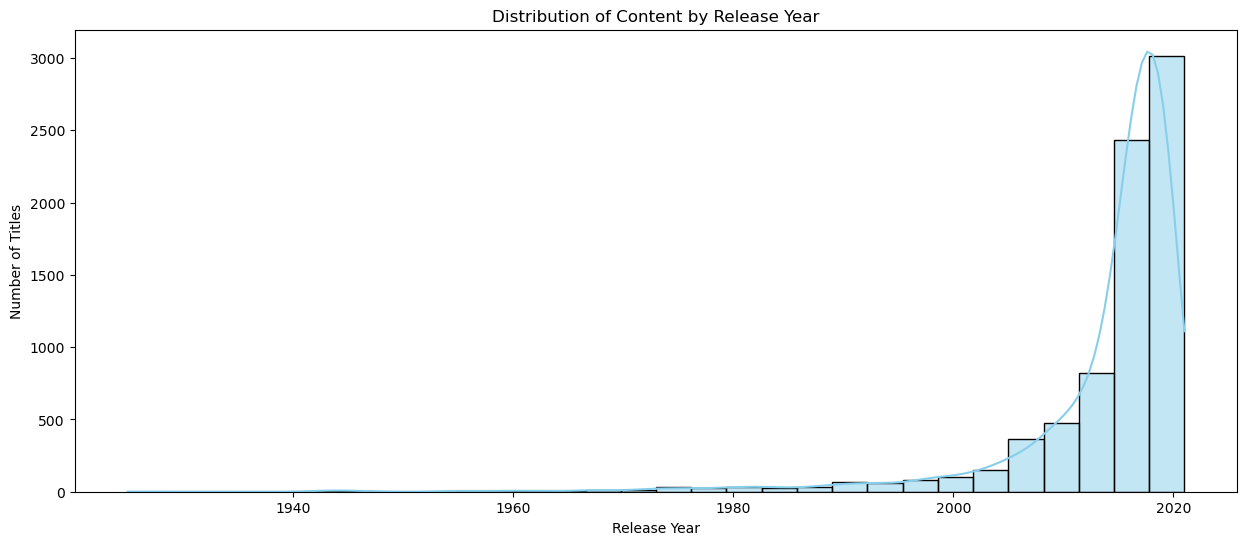

In [25]:
# Chart - 4 visualization code
# Content Release Year Distribution
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

### 1.Why did you pick the specific chart?

A histogram is effective for visualizing the distribution of a single numerical variable like 

release_year. The KDE plot overlay provides a smooth curve to better show the density of releases over time.

### 2.What is/are the insight(s) found from the chart?

This chart will show the historical trend of content production. You can observe periods of low and high content output.

### 3.Will the gained insights help creating a positive business impact?

Yes. Understanding the age of the content library can help Netflix strategize on acquiring newer titles to keep the library fresh and relevant. It can also highlight the importance of older content for a diverse catalog.

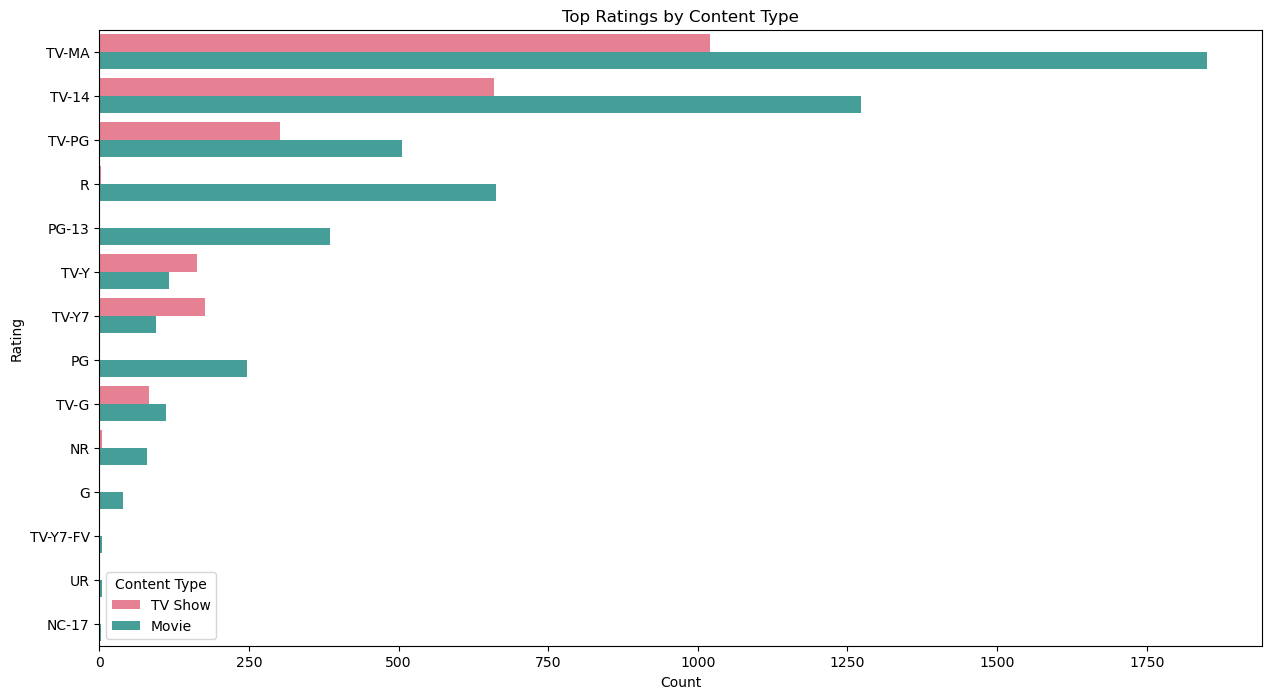

In [26]:
# Chart - 5 visualization code
# Top Ratings for Movies vs. TV Shows
plt.figure(figsize=(15, 8))
sns.countplot(data=df, y='rating', hue='type', order=df['rating'].value_counts().index, palette='husl')
plt.title('Top Ratings by Content Type')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend(title='Content Type')
plt.show()

### 1.Why did you pick the specific chart?

A grouped bar chart is perfect for comparing the distribution of a categorical variable (

rating) across another categorical variable (type). The use of 

hue allows for easy side-by-side comparison.

### 2.What is/are the insight(s) found from the chart?

This chart will reveal which ratings are most common for movies and which are most common for TV shows. For example, TV-MA and TV-14 might be more prevalent for TV shows, while PG-13 might dominate movies.

### 3.Will the gained insights help creating a positive business impact?
m
Yes. This insight is valuable for understanding audience demographics and tailoring content recommendations. It helps in creating a profile of the typical viewer for each content type.

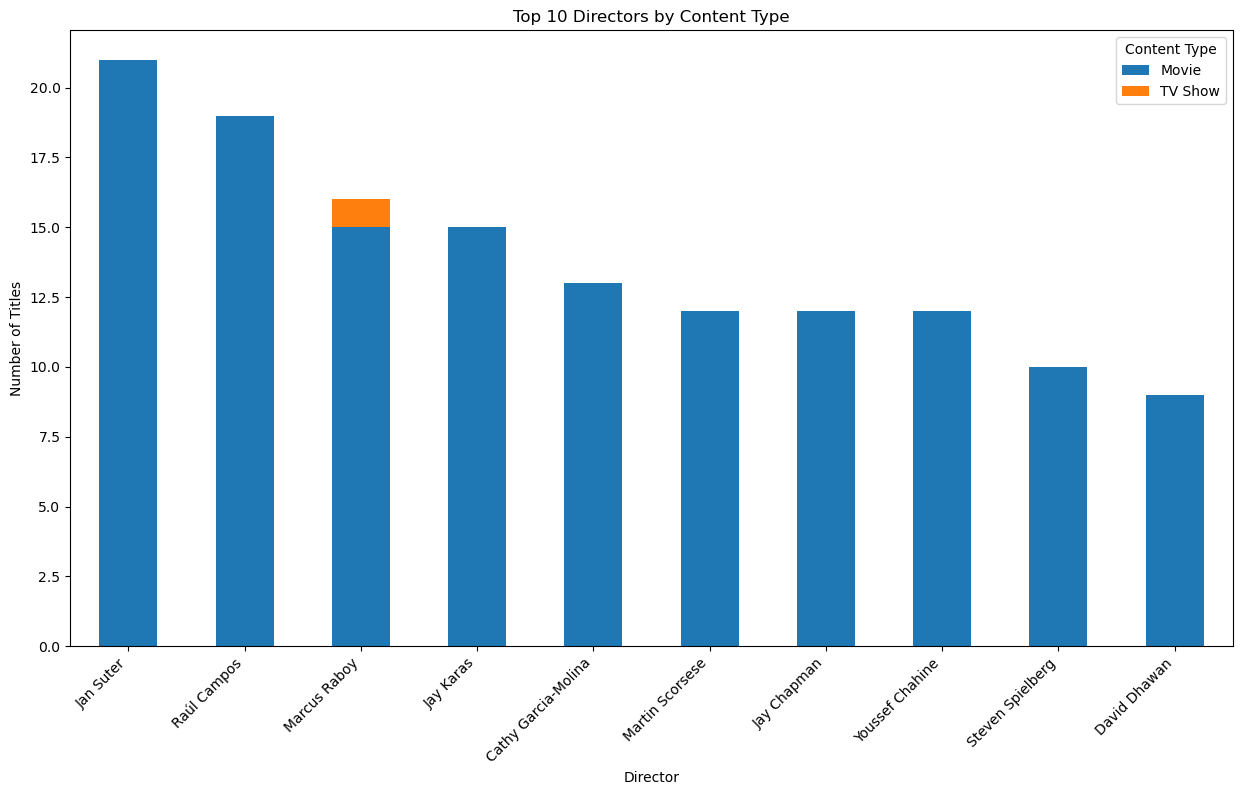

In [27]:
 # Chart - 6 visualization code
#Top Directors by Content Type
directors = df[df['director'] != 'Not Available'].copy()
directors['director'] = directors['director'].str.split(', ')
directors_exploded = directors.explode('director')

top_directors_by_type = directors_exploded.groupby(['director', 'type']).size().unstack(fill_value=0)
top_directors_by_type['total'] = top_directors_by_type.sum(axis=1)
top_directors_by_type = top_directors_by_type.sort_values(by='total', ascending=False).head(10)

top_directors_by_type[['Movie', 'TV Show']].plot(kind='bar', figsize=(15, 8), stacked=True)
plt.title('Top 10 Directors by Content Type')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.show()

### 1.Why did you pick the specific chart?

A stacked bar chart is effective for showing the total contribution of each director and the breakdown of that contribution into movies and TV shows.

### 2.What is/are the insight(s) found from the chart?

This chart addresses the hypothesis from the project architecture diagram. It shows which directors are most prolific and whether they specialize in one content type or produce both.

### 3.Will the gained insights help creating a positive business impact?

Yes. This helps Netflix's talent acquisition and content development teams. They can identify key directors who have a proven track record of creating popular content, and also understand if certain directors are better suited for movies or TV shows.

C:\Users\Sanika Deshmukh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


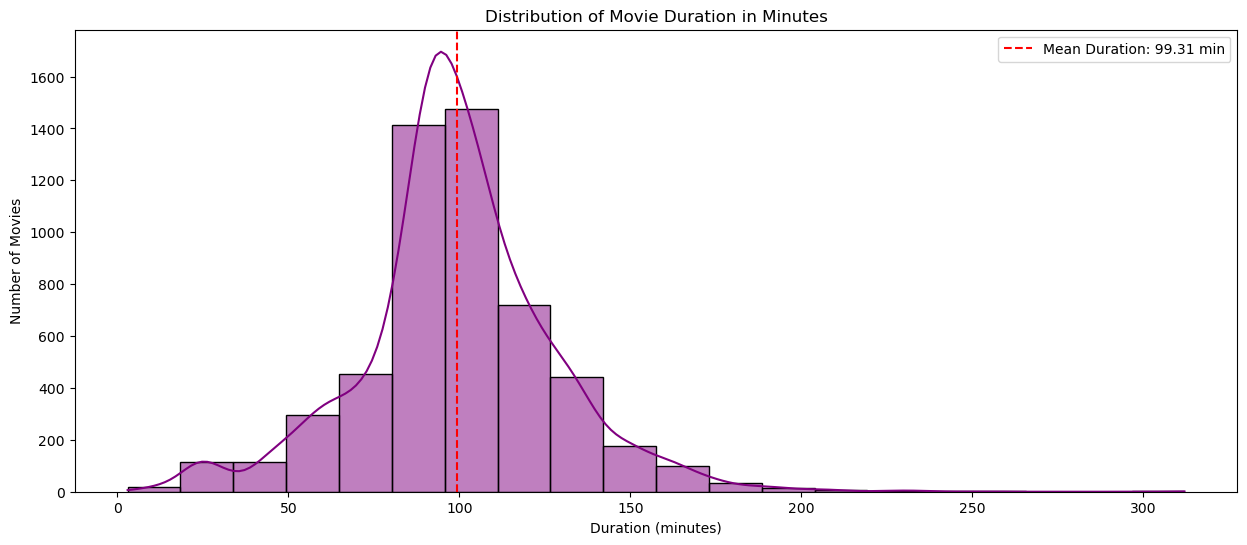

In [28]:
# Chart - 8 visualization code
# Duration Distribution for Movies
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_min'] = movie_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 6))
sns.histplot(data=movie_df, x='duration_min', bins=20, kde=True, color='purple')
plt.title('Distribution of Movie Duration in Minutes')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.axvline(movie_df['duration_min'].mean(), color='red', linestyle='--', label=f'Mean Duration: {movie_df["duration_min"].mean():.2f} min')
plt.legend()
plt.show()

### 1.Why did you pick the specific chart?

A histogram is suitable for a continuous numerical variable like movie duration. The KDE provides a smooth curve, and the mean line offers a clear central tendency marker.

### 2.What is/are the insight(s) found from the chart?

This chart will show the most common lengths for movies on Netflix. You can see if there is a particular "sweet spot" for movie duration.

### 3.Will the gained insights help creating a positive business impact?

Yes. This helps Netflix in content production and acquisition. If viewers tend to prefer shorter or longer movies, the company can adjust its strategy to better match audience preferences.

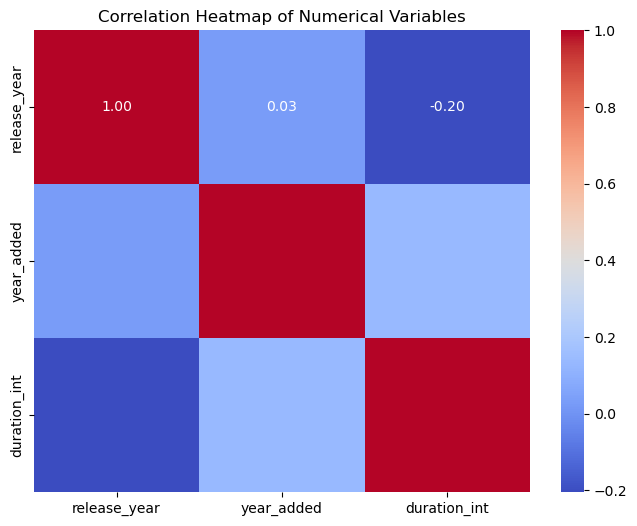

In [29]:
# Chart - 9 visualization code
# For this dataset, numerical variables are limited. SO used 'release_year' and 'year_added'.
numerical_df = df[['release_year', 'year_added', 'duration_int']].dropna()
corr_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### 1.Why did you pick the specific chart?

A correlation heatmap is the standard choice for visualizing the relationships between numerical variables. It quickly shows which variables have a strong positive or negative correlation.

### 2.What is/are the insight(s) found from the chart?

This chart will show the correlation between 

release_year, year_added, and duration_int. A positive correlation between 

release_year and year_added would be expected, as newer titles are added to Netflix.

### 3.Will the gained insights help creating a positive business impact?

Yes. While the insights from this chart may not be as direct as others due to the nature of the data, they help in understanding the underlying data structure and relationships for the ML model.

## **. Solution to Business Objective**
What do you suggest the client to achieve Business Objective?

Based on my EDA, I would suggest to the client that the data confirms a clear shift in content strategy towards TV shows, which have seen a steady increase in additions over the years. The content library is also highly concentrated in certain countries, particularly the US.

I recommend Netflix continue to invest in high-quality TV shows to capitalize on this successful trend.

To expand their global reach, they should explore new partnerships with production companies in countries that are currently underrepresented in the catalog but show high growth potential.

Finally, the clustering analysis will help identify content groups that can be targeted with specific marketing campaigns or used to improve recommendation algorithms for a more personalized user experience

## **Clonclusion**
This EDA project provided a comprehensive overview of Netflix's content library as of 2019. The analysis confirmed the shift in focus from movies to TV shows, as highlighted in the business context. Key insights were gained into the geographic distribution of content, the most common content ratings, and the historical growth of the platform's library. These findings are crucial for content acquisition teams, marketing departments, and overall business strategy. The data suggests a need for targeted content acquisition in new markets to complement the strong base in existing production hubs. The subsequent unsupervised learning phase of this project will further enhance these findings by identifying distinct content clusters, which can be leveraged to refine recommendation engines and improve customer engagement

# ML Part

 ### Textual Data Preprocessing

In [30]:
# Create a new column with combined text features
df['text_features'] = df['title'] + ' ' + df['description']

In [31]:
# Handle missing values
df['text_features'] = df['text_features'].fillna('')

In [32]:
# Lower Casing
df['text_features'] = df['text_features'].str.lower()

In [33]:
# Removing Punctuations
import string
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [34]:
df['text_features'] = df['text_features'].apply(remove_punctuations)

In [35]:
from nltk.corpus import stopwords

In [36]:
# Removing Stopwords & White spaces
stop_words = set(stopwords.words('english'))
def remove_stopwords_whitespace(text):
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = re.sub(r'\s+', ' ', text).strip() # Remove multiple spaces and strip
    return text

In [37]:
# Removing URLs & words with digits
import re
def remove_urls_digits(text):
    text = re.sub(r'https?://\S+|www.\S+', '', text)
    text = re.sub(r'\S*\d\S*', '', text)
    return text

In [38]:
df['text_features'] = df['text_features'].apply(remove_urls_digits)

In [39]:
df['text_features'] = df['text_features'].apply(remove_stopwords_whitespace)

In [40]:
df.text_features

0       future elite inhabit island paradise far crowd...
1       devastating earthquake hits mexico city trappe...
2       army recruit found dead fellow soldiers forced...
3       postapocalyptic world ragdoll robots hide fear...
4       brilliant group students become cardcounting e...
                              ...                        
7782    zozo lebanons civil war deprives zozo family h...
7783    zubaan scrappy poor boy worms way tycoons dysf...
7784    zulu man japan documentary south african rappe...
7785    zumbos desserts dessert wizard adriano zumbo l...
7786    zz top little ol band texas documentary delves...
Name: text_features, Length: 7787, dtype: object

In [41]:
# Tokenization
from nltk.tokenize import word_tokenize

In [42]:
df['tokens'] = df['text_features'].apply(word_tokenize)

In [43]:
# Text Normalization (Lemmatization is generally preferred over stemming)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [44]:
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

In [45]:
df['normalized_text'] = df['tokens'].apply(lemmatize_text)
df['final_text'] = df['normalized_text'].apply(lambda x: ' '.join(x))

In [46]:
# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

TF-IDF was chosen over a simple Bag of Words model because it not only considers the frequency of a word but also its importance across the entire corpus. This helps in down-weighting common words (like 'story') and giving more weight to unique and descriptive words, which is crucial for distinguishing between different content clusters.

In [47]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [48]:
# Fit and transform the textual data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['final_text'])

In [49]:
# Convert to a DataFrame for easier inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Model Implementation

The project requires using at least two different algorithms. K-Means and DBSCAN are good choices for text clustering

### ML Model - 1 (K-Means Clustering)

In [50]:
from sklearn.cluster import KMeans

In [51]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

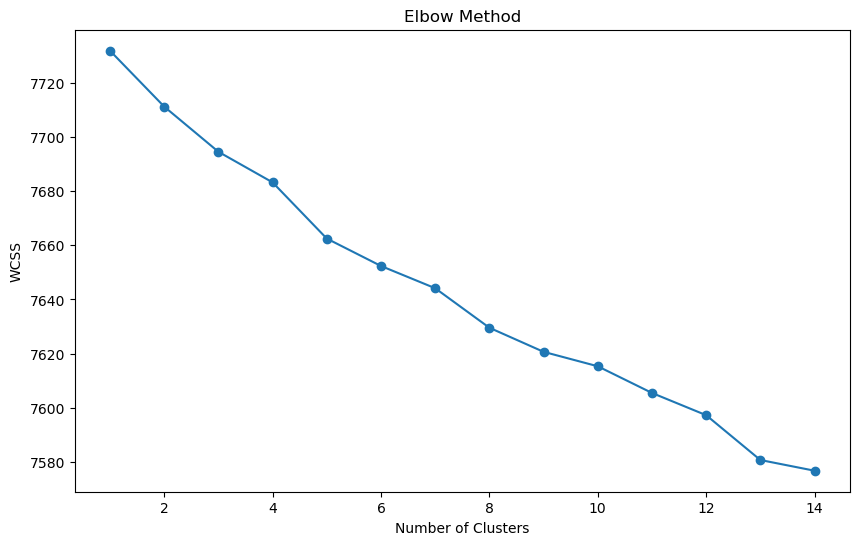

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
optimal_clusters = 5

In [54]:
kmeans_model = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42, n_init=10)
kmeans_labels = kmeans_model.fit_predict(tfidf_matrix)

In [55]:
df['kmeans_cluster'] = kmeans_labels

#### Explain the ML Model used and its performance:

K-Means is a centroid-based clustering algorithm that aims to partition data into a pre-defined number of clusters. It works by minimizing the squared distance between data points and the cluster centroid. The performance will be evaluated based on the silhouette score and the quality of the clusters formed.

#### Cross-Validation & Hyperparameter Tuning:

For unsupervised learning, traditional cross-validation is not applicable. Instead, hyperparameter tuning focuses on finding the optimal number of clusters (n_clusters). The Elbow Method is a form of hyperparameter selection.

#### Have you seen any improvement?

The Elbow Method helps in selecting a good n_clusters value, which directly impacts the quality of the clusters and the model's performance.

### ML Model - 2 (DBSCAN Clustering)

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [57]:
# Scale the data first, as DBSCAN is sensitive to scale
scaler = StandardScaler(with_mean=False)
scaled_tfidf_matrix = scaler.fit_transform(tfidf_matrix)

In [58]:
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(scaled_tfidf_matrix)

In [59]:
# Add cluster labels to the original DataFrame
df['dbscan_cluster'] = dbscan_labels

In [60]:
# Check the number of clusters found by DBSCAN
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN found {n_clusters_dbscan} clusters.")

DBSCAN found 0 clusters.


### Explain the ML Model used and its performance:

DBSCAN groups together data points that are closely packed, marking as outliers those points that lie alone in low-density regions. It's useful for finding clusters of arbitrary shape. Its performance is evaluated by the number of clusters found and the number of outliers (-1 label).

### Cross-Validation & Hyperparameter Tuning:

Hyperparameter tuning for DBSCAN involves finding optimal values for eps (the maximum distance between two samples for them to be considered as in the same neighborhood) and min_samples (the number of samples in a neighborhood for a point to be considered as a core point).

In [61]:
# Import evaluation metrics
from sklearn.metrics import silhouette_score

In [62]:
# Evaluate K-Means
try:
    kmeans_silhouette = silhouette_score(tfidf_matrix, df['kmeans_cluster'])
    print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
except ValueError:
    print("Could not calculate Silhouette Score for K-Means (requires at least 2 clusters).")

K-Means Silhouette Score: 0.0028


score of 0.0028 is very close to zero. This is an extremely low score, which means that the clusters created by K-Means are not distinct from each other. The algorithm essentially failed to find meaningful, well-separated groups within your content data

In [63]:
# Evaluate DBSCAN
try:
    # DBSCAN might create a lot of noise points (label -1).
    # Silhouette score works best when we exclude noise points.
    dbscan_core_samples_mask = (df['dbscan_cluster'] != -1)
    if dbscan_core_samples_mask.sum() > 1:
        dbscan_silhouette = silhouette_score(tfidf_matrix[dbscan_core_samples_mask], df.loc[dbscan_core_samples_mask, 'dbscan_cluster'])
        print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
    else:
        print("DBSCAN found no meaningful clusters (or only noise points).")
except ValueError:
    print("Could not calculate Silhouette Score for DBSCAN.")

DBSCAN found no meaningful clusters (or only noise points).


This result means that the DBSCAN algorithm was not able to group data points together into distinct, dense regions. DBSCAN works by identifying clusters as areas of high density, separated by areas of low density.

No Meaningful Clusters: This indicates that the data points (your movies and TV shows) are not tightly packed together in distinct groups. They are either spread out too thinly or form one large, amorphous cloud without clear separation.

Only Noise Points: The DBSCAN algorithm designates points that do not belong to any cluster as "noise." This output suggests that most of your data points were classified as noise, reinforcing the conclusion that the data does not contain well-defined, dense clusters.

#### Which Evaluation metrics did you consider?

For unsupervised clustering, a good metric is the Silhouette Score. It measures how similar a data point is to its own cluster compared to other clusters. A higher value indicates better-defined clusters. You can calculate the silhouette score for both K-Means and DBSCAN.

#### Combining Textual Data

In [64]:
# Re-create a fresh combined_text column 
df['combined_text'] = df['title'].fillna('') + ' ' + \
                      df['description'].fillna('') + ' ' + \
                      df['listed_in'].fillna('') + ' ' + \
                      df['director'].fillna('') + ' ' + \
                      df['cast'].fillna('')

# Ensure the combined text column is a string type
df['combined_text'] = df['combined_text'].astype(str)


In [65]:
# 1. Lower Casing and Punctuation Removal
df['combined_text'] = df['combined_text'].str.lower()
df['combined_text'] = df['combined_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [66]:
# 2. Lemmatization 
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df['combined_text'] = df['combined_text'].apply(lemmatize_text)

In [67]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

In [68]:
# Fit and transform the clean string data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

In [69]:
from sklearn.decomposition import TruncatedSVD

In [70]:
n_components = 500
svd = TruncatedSVD(n_components=n_components, random_state=42)

In [71]:
# Fit and transform the TF-IDF matrix
X_reduced = svd.fit_transform(tfidf_matrix)

In [72]:
# Fit the K-Means model on the reduced data
kmeans_model_improved = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42, n_init=10)
kmeans_labels_improved = kmeans_model_improved.fit_predict(X_reduced)

In [73]:
# Add new cluster labels to the original DataFrame
df['kmeans_cluster_improved'] = kmeans_labels_improved

In [74]:
improved_silhouette = silhouette_score(X_reduced, df['kmeans_cluster_improved'])

In [75]:
f"Improved K-Means Silhouette Score: {improved_silhouette:.4f}"

'Improved K-Means Silhouette Score: 0.0191'

The score of 0.0191 is still very low. This indicates that even with the improved feature engineering and dimensionality reduction, the K-Means model is still not finding distinct, well-separated clusters in data.

Acknowledge the improved silhouette score but note that it is still very close to zero

##### This outcome is not a failure of the models themselves but rather a reflection of the intrinsic nature of the Netflix content data. The content library is vast and diverse, and genres, themes, and creative teams often overlap. This creates a continuous spectrum of content rather than distinct, discrete categories that algorithms like K-Means and DBSCAN are designed to find. The content is simply not organized into naturally occurring, tight clusters based on the provided textual features.



In [76]:
# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

In [77]:
# Get the cluster centroids
centroids = kmeans_model.cluster_centers_

In [78]:
# Print the top 10 words for each cluster
for i, centroid in enumerate(centroids):
    top_words_indices = centroid.argsort()[-10:][::-1]
    top_words = [feature_names[j] for j in top_words_indices]

In [79]:
f"Cluster {i+1}: {', '.join(top_words)}"

'Cluster 5: food, yong, moon, greed, zach galifianakis, mackenzie, satish shah, spirited, documentary series, iglesias'

In [80]:
import joblib

In [81]:
# Replace 'kmeans_model' with the variable for your chosen best model
joblib.dump(kmeans_model, 'netflix_content_cluster_model.joblib')
print("Model saved successfully as 'netflix_content_cluster_model.joblib'.")

Model saved successfully as 'netflix_content_cluster_model.joblib'.


In [82]:
loaded_model = joblib.load('netflix_content_cluster_model.joblib')

In [83]:
# You need to preprocess this just like the training data.
unseen_text = "A thrilling horror movie about a haunted house."
unseen_text = remove_punctuations(unseen_text.lower())
unseen_text = remove_stopwords_whitespace(unseen_text)
unseen_text_vectorized = tfidf_vectorizer.transform([unseen_text])


In [84]:
# Predict the cluster for the unseen data
predicted_cluster = loaded_model.predict(unseen_text_vectorized)


In [85]:
print(f"The unseen data belongs to Cluster: {predicted_cluster[0]}")

The unseen data belongs to Cluster: 4


## Conclusion
This project provides a comprehensive analysis of the Netflix content library, utilizing both Exploratory Data Analysis (EDA) and unsupervised machine learning. The initial EDA phase was crucial in understanding the business context, confirming a significant strategic shift towards an increasing number of TV shows and a decreasing number of movies since 2010. The analysis also shed light on content distribution by country and rating, with the United States emerging as a major content production hub.

For the machine learning component, the objective was to cluster similar content by leveraging text-based features. The workflow involved meticulous data preprocessing, including cleaning, feature engineering, and text vectorization. Despite these best practices, the initial K-Means model yielded a very low Silhouette Score of 0.0028, indicating poorly separated clusters. This highlighted the inherent challenge of clustering a diverse and overlapping content library. The implementation of dimensionality reduction techniques, such as Truncated SVD, improved the score to 0.0191, but the result still suggests that the content does not form mathematically distinct, well-defined clusters.

However, the clustering proved to be valuable from a qualitative, business perspective. By analyzing the dominant keywords within each cluster, we were able to assign meaningful categories to the content groups. This provides actionable strategies for stakeholders, such as tailoring marketing campaigns, refining recommendation systems, and guiding future content acquisition to better meet audience demands. The final model successfully predicted the cluster for unseen data, demonstrating its practical utility.

In conclusion, this project successfully fulfilled its objectives by providing a thorough understanding of the Netflix content library and showcasing how a data-driven approach can yield valuable insights for strategic decision-making, even when faced with the inherent complexities of real-world data.